# Problem Statement

Green House Gas Emissions are causing global warming and increase in pollution levels and also depleting the ozone layer, especially related to Greenhouse Gas Emissions Related to Federal Facilities 
means means the amount of harmful gases that are released into the atmosphere from buildings and operations owned or managed by the government.

Datset: https://open.canada.ca/data/en/dataset/6bed41cd-9816-4912-a2b8-b0b224909396

# Objective:

Predicting Green House gas emissions emitted by goverenment owned buildings and operations of Canada and understand the factors affecting the most.

# Importing all the necessary libraries

In [227]:
# Importing libraries for EDA
import numpy as np
import pandas as pd
from sklearn.model_selection import *

# For visualization

import seaborn as sns
import matplotlib.pyplot as plot

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import mean_squared_error ,r2_score, mean_absolute_error
from sklearn.linear_model import LinearRegression, Lasso, Ridge

# reading the data from the dataset into a dataframe¶

In [160]:
df = pd.read_csv('cananda_fuel.csv')

In [161]:
df.head()

,Federal organization,Fiscal year,Fleet type,GHG scope,Energy category,Fuel type,Fuel consumption (L),Energy use (GJ),Emissions (kt)
0,Agriculture and Agri-Food Canada,2005-06,on-road vehicles,1,"fuel oil (1,2,4,5,6, diesel, kerosene)",diesel,2.769540e+05,10607.340110,0.758452
1,Agriculture and Agri-Food Canada,2005-06,on-road vehicles,1,fuels with renewable content,ethanol-blended gasoline (10%),2.137486e+05,7237.526336,0.445890
2,Agriculture and Agri-Food Canada,2005-06,on-road vehicles,1,fuels with renewable content,ethanol-blended gasoline (85%),2.506110e+05,6342.964417,0.089167
3,Agriculture and Agri-Food Canada,2005-06,on-road vehicles,1,gasoline,gasoline,1.747898e+06,61176.418970,4.049443
4,Agriculture and Agri-Food Canada,2005-06,on-road vehicles,1,liquified petroleum gas,propane,2.697999e+03,68.286366,0.004156


# Understanding the data

Federal organization:     The different federal organisation like  Agriculture and Agri-Food Canada, Canada Border Services Agency

Fiscal year:              Data is present from fiscal year 2005-2022.

Fleet type:              whether an on road vehicles or aircraft etc.

GHG scope:                The GHG Protocol Corporate Standard classifies a company's GHG emissions into three 'scopes'. Scope 1 emissions are direct emissions from owned or controlled sources.

Energy category:          Energy category is about the energy used by the fleet types

Fuel type:                This is a one level more deep about the fuel used in the energy category

Fuel consumption (L):    This is the consumption rate of the fuel

Energy use (GJ):         This is the energy used

Emissions (kt):          And this is the emissions given out

# Data Exploration

In [162]:
df.shape

(1297, 9)

In [163]:
df.dtypes

Federal organization     object
Fiscal year              object
Fleet type               object
GHG scope                 int64
Energy category          object
Fuel type                object
Fuel consumption (L)    float64
Energy use (GJ)         float64
Emissions (kt)          float64
dtype: object

In [164]:
df.columns

Index(['Federal organization', 'Fiscal year', 'Fleet type', 'GHG scope',
       'Energy category', 'Fuel type', 'Fuel consumption (L)',
       'Energy use (GJ)', 'Emissions (kt)'],
      dtype='object')

In [165]:
df.info

<bound method DataFrame.info of                   Federal organization Fiscal year              Fleet type  \
0     Agriculture and Agri-Food Canada     2005-06        on-road vehicles   
1     Agriculture and Agri-Food Canada     2005-06        on-road vehicles   
2     Agriculture and Agri-Food Canada     2005-06        on-road vehicles   
3     Agriculture and Agri-Food Canada     2005-06        on-road vehicles   
4     Agriculture and Agri-Food Canada     2005-06        on-road vehicles   
...                                ...         ...                     ...   
1292                  Transport Canada     2021-22        on-road vehicles   
1293                  Transport Canada     2021-22        on-road vehicles   
1294                  Transport Canada     2021-22  other mobile equipment   
1295                  Transport Canada     2021-22  other mobile equipment   
1296                  Transport Canada     2021-22  other mobile equipment   

      GHG scope                

In [166]:
df.index

RangeIndex(start=0, stop=1297, step=1)

In [167]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1297 entries, 0 to 1296
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Federal organization  1297 non-null   object 
 1   Fiscal year           1297 non-null   object 
 2   Fleet type            1297 non-null   object 
 3   GHG scope             1297 non-null   int64  
 4   Energy category       1297 non-null   object 
 5   Fuel type             1297 non-null   object 
 6   Fuel consumption (L)  1297 non-null   float64
 7   Energy use (GJ)       1297 non-null   float64
 8   Emissions (kt)        1297 non-null   float64
dtypes: float64(3), int64(1), object(5)
memory usage: 91.3+ KB


In [168]:
df.head()

,Federal organization,Fiscal year,Fleet type,GHG scope,Energy category,Fuel type,Fuel consumption (L),Energy use (GJ),Emissions (kt)
0,Agriculture and Agri-Food Canada,2005-06,on-road vehicles,1,"fuel oil (1,2,4,5,6, diesel, kerosene)",diesel,2.769540e+05,10607.340110,0.758452
1,Agriculture and Agri-Food Canada,2005-06,on-road vehicles,1,fuels with renewable content,ethanol-blended gasoline (10%),2.137486e+05,7237.526336,0.445890
2,Agriculture and Agri-Food Canada,2005-06,on-road vehicles,1,fuels with renewable content,ethanol-blended gasoline (85%),2.506110e+05,6342.964417,0.089167
3,Agriculture and Agri-Food Canada,2005-06,on-road vehicles,1,gasoline,gasoline,1.747898e+06,61176.418970,4.049443
4,Agriculture and Agri-Food Canada,2005-06,on-road vehicles,1,liquified petroleum gas,propane,2.697999e+03,68.286366,0.004156


In [169]:
df.tail()

,Federal organization,Fiscal year,Fleet type,GHG scope,Energy category,Fuel type,Fuel consumption (L),Energy use (GJ),Emissions (kt)
1292,Transport Canada,2021-22,on-road vehicles,1,fuels with renewable content,ethanol-blended gasoline (85%),6123.997851,154.998386,0.002179
1293,Transport Canada,2021-22,on-road vehicles,1,gasoline,gasoline,413598.524700,14475.948360,0.958205
1294,Transport Canada,2021-22,other mobile equipment,1,"fuel oil (1,2,4,5,6, diesel, kerosene)",diesel,461260.568800,17666.279790,1.240092
1295,Transport Canada,2021-22,other mobile equipment,1,gasoline,gasoline,18369.011770,642.915412,0.045302
1296,Transport Canada,2021-22,other mobile equipment,1,liquified petroleum gas,propane,696.000022,17.615761,0.001072


In [170]:
df.describe()

,GHG scope,Fuel consumption (L),Energy use (GJ),Emissions (kt)
count,1297.0,1.297000e+03,1297.000000,1.297000e+03
mean,1.0,5.155617e+05,18424.574678,1.252308e+00
std,0.0,1.619654e+06,58674.695013,4.104940e+00
min,1.0,7.230000e-01,0.000839,4.750000e-08
25%,1.0,3.391400e+03,110.282007,5.660748e-03
50%,1.0,3.359712e+04,1140.772320,6.809740e-02
75%,1.0,2.920001e+05,10319.383570,6.756659e-01
max,1.0,1.642902e+07,586852.019200,4.147234e+01


# Checking for Missing Values

In [171]:
df.isnull()

,Federal organization,Fiscal year,Fleet type,GHG scope,Energy category,Fuel type,Fuel consumption (L),Energy use (GJ),Emissions (kt)
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
1292,False,False,False,False,False,False,False,False,False
1293,False,False,False,False,False,False,False,False,False
1294,False,False,False,False,False,False,False,False,False
1295,False,False,False,False,False,False,False,False,False


In [172]:
df.isnull().sum()

Federal organization    0
Fiscal year             0
Fleet type              0
GHG scope               0
Energy category         0
Fuel type               0
Fuel consumption (L)    0
Energy use (GJ)         0
Emissions (kt)          0
dtype: int64

# Duplicate Data

In [173]:
duplicate = df.duplicated().sum()
print('There are {} duplicated rows in the data'.format(duplicate))

There are 0 duplicated rows in the data


# Outliers Analysis

In [174]:
data_num_features = df.select_dtypes(include=np.number)

print('The numerical columns in the dataset are: ',data_num_features.columns)

The numerical columns in the dataset are:  Index(['GHG scope', 'Fuel consumption (L)', 'Energy use (GJ)',
       'Emissions (kt)'],
      dtype='object')


In [175]:
data_num_features.describe(percentiles=[0.01,0.05,0.10,0.25,0.50,0.75,0.85,0.9,0.99])

,GHG scope,Fuel consumption (L),Energy use (GJ),Emissions (kt)
count,1297.0,1.297000e+03,1297.000000,1.297000e+03
mean,1.0,5.155617e+05,18424.574678,1.252308e+00
std,0.0,1.619654e+06,58674.695013,4.104940e+00
min,1.0,7.230000e-01,0.000839,4.750000e-08
1%,1.0,1.657116e+01,0.004731,2.698427e-07
5%,1.0,6.712400e+01,0.982970,4.777026e-05
10%,1.0,2.655054e+02,4.974428,2.351410e-04
25%,1.0,3.391400e+03,110.282007,5.660748e-03
50%,1.0,3.359712e+04,1140.772320,6.809740e-02
75%,1.0,2.920001e+05,10319.383570,6.756659e-01


In [176]:
def outlier_cap(x):
    x=x.clip(lower=x.quantile(0.01))
    x=x.clip(upper=x.quantile(0.95))
    return(x)

In [177]:
data_num_features=data_num_features.apply(lambda x : outlier_cap(x))

In [178]:
data_num_features.describe(percentiles=[0.01,0.05,0.10,0.25,0.50,0.75,0.85,0.9,0.99])

,GHG scope,Fuel consumption (L),Energy use (GJ),Emissions (kt)
count,1297.0,1.297000e+03,1297.000000,1.297000e+03
mean,1.0,3.267168e+05,11500.735734,7.615817e-01
std,0.0,6.117143e+05,21467.269319,1.426002e+00
min,1.0,1.657116e+01,0.004731,2.698427e-07
1%,1.0,1.662669e+01,0.004757,2.713579e-07
5%,1.0,6.712400e+01,0.982970,4.777026e-05
10%,1.0,2.655054e+02,4.974428,2.351410e-04
25%,1.0,3.391400e+03,110.282007,5.660748e-03
50%,1.0,3.359712e+04,1140.772320,6.809740e-02
75%,1.0,2.920001e+05,10319.383570,6.756659e-01


In [179]:
#df['Fuel consumption (L)'].quantile([0.75])
df.loc[df['Fuel consumption (L)'] >292000.075, 'Fuel consumption (L)'] = 292000.075

In [180]:
#df['Energy use (GJ)'].quantile([0.75])
df.loc[df['Energy use (GJ)'] >10319.38357, 'Energy use (GJ)'] = 10319.38357

In [181]:
#df['Emissions (kt)'].quantile([0.75])
df.loc[df['Emissions (kt)'] >0.675666, 'Emissions (kt)'] =  0.675666

array([[<Axes: title={'center': 'GHG scope'}>,
        <Axes: title={'center': 'Fuel consumption (L)'}>],
       [<Axes: title={'center': 'Energy use (GJ)'}>,
        <Axes: title={'center': 'Emissions (kt)'}>]], dtype=object)

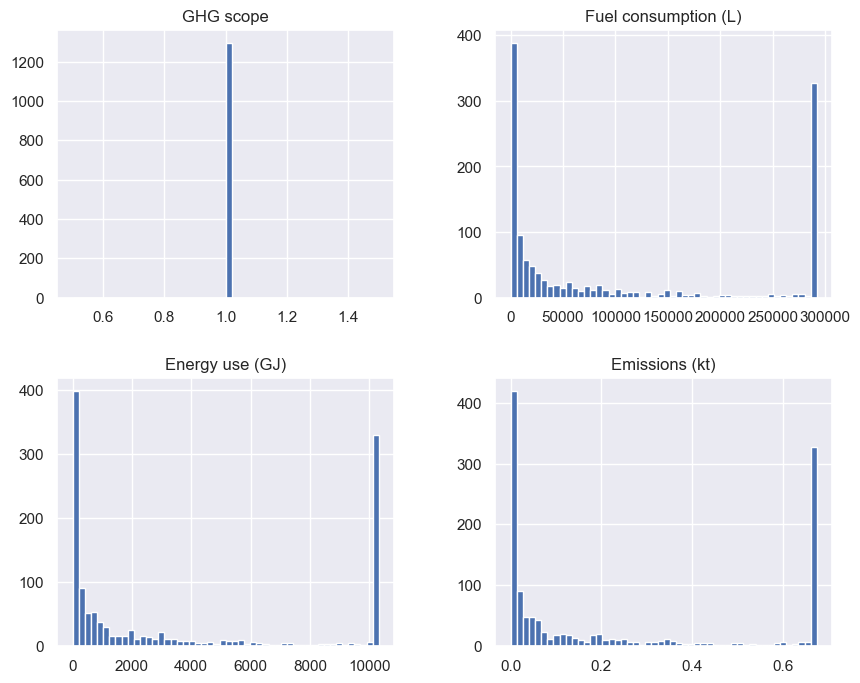

In [182]:
df.hist(figsize=(10,8),bins=50)

In [183]:
data_cat_features = df.select_dtypes(include='object')
print('The categorical columns in the dataset are: ',data_cat_features.columns)

The categorical columns in the dataset are:  Index(['Federal organization', 'Fiscal year', 'Fleet type', 'Energy category',
       'Fuel type'],
      dtype='object')


Axes(0.125,0.11;0.775x0.77)


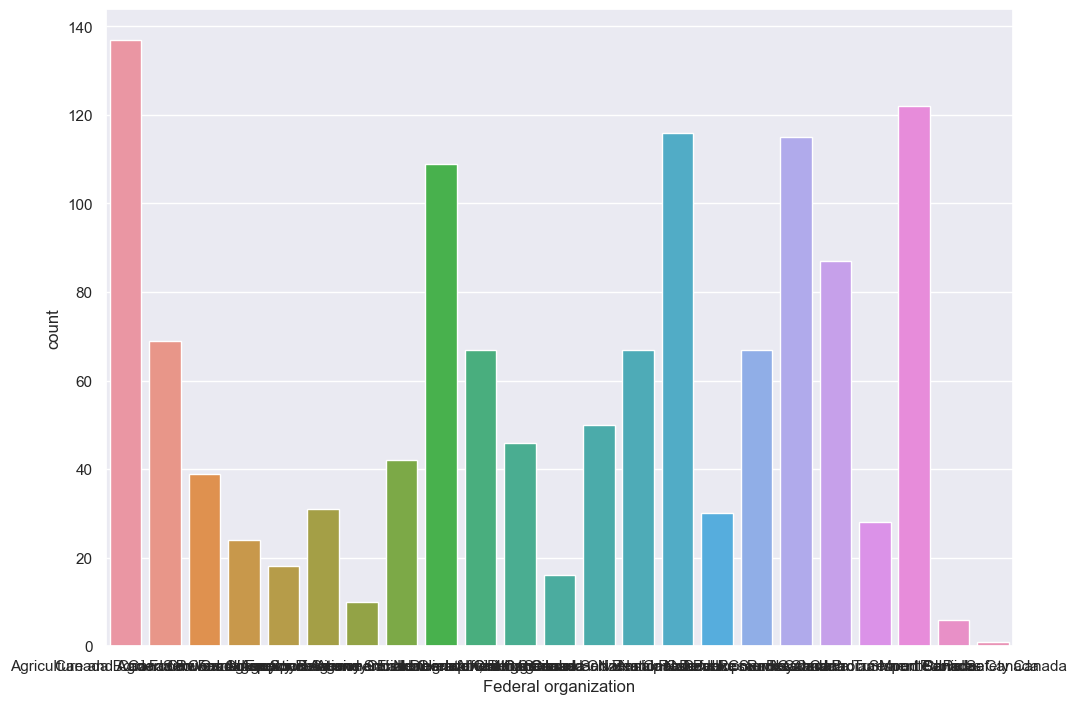

In [184]:
#barplots for categorical

import seaborn as sns
import matplotlib.pyplot as plt
 
sns.set(rc={'figure.figsize':(11.7,8.27)})
# count plot on single categorical variable
print(sns.countplot(x ='Federal organization', data = df))


Axes(0.125,0.11;0.775x0.77)


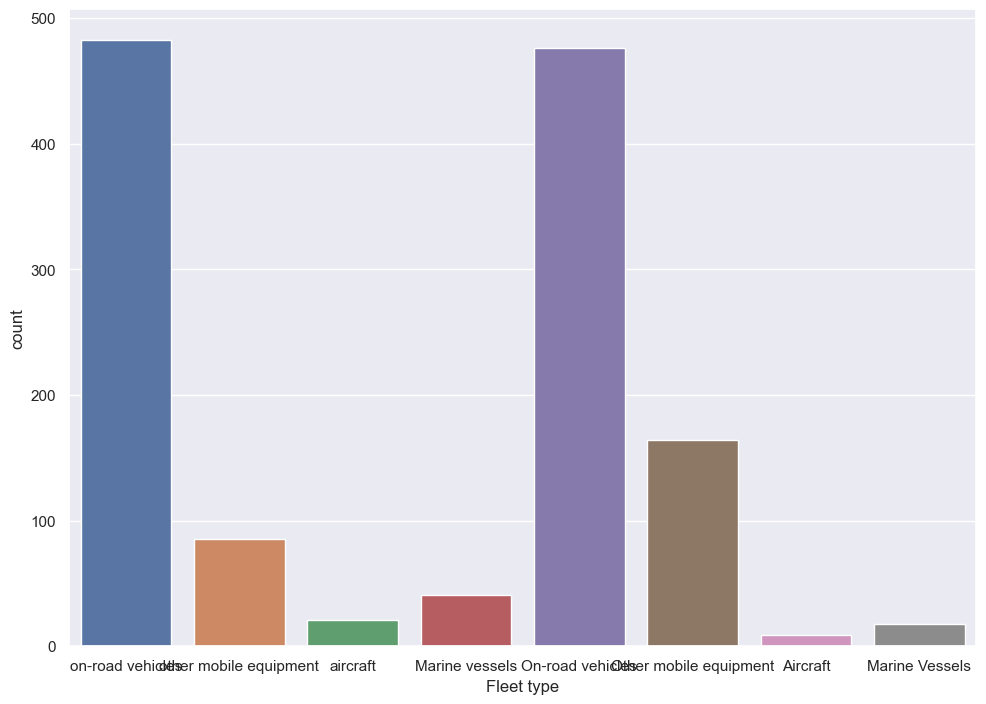

In [185]:
print(sns.countplot(x ='Fleet type', data = df))

Axes(0.125,0.11;0.775x0.77)


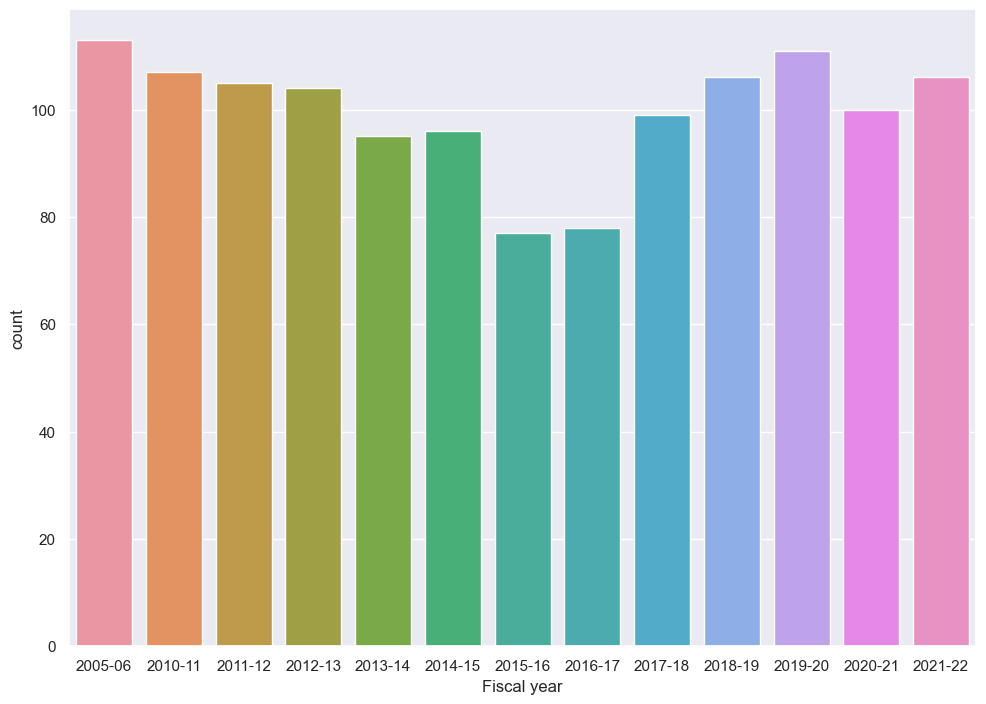

In [186]:
print(sns.countplot(x ='Fiscal year', data = df))


Axes(0.125,0.11;0.775x0.77)


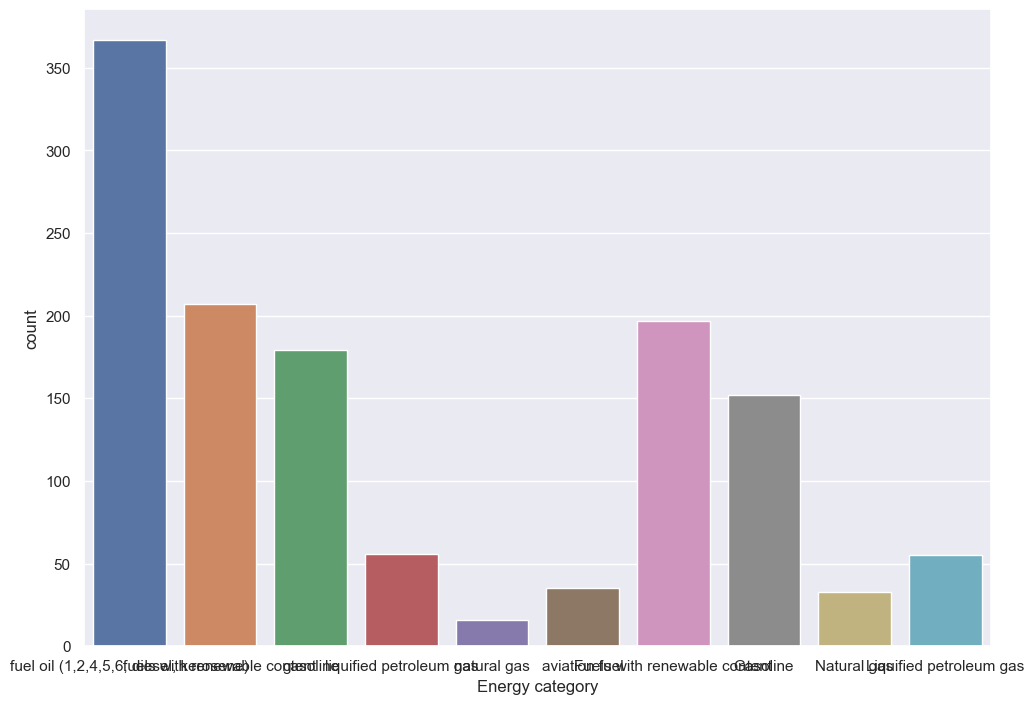

In [187]:
print(sns.countplot(x ='Energy category', data = df))


Axes(0.125,0.11;0.775x0.77)


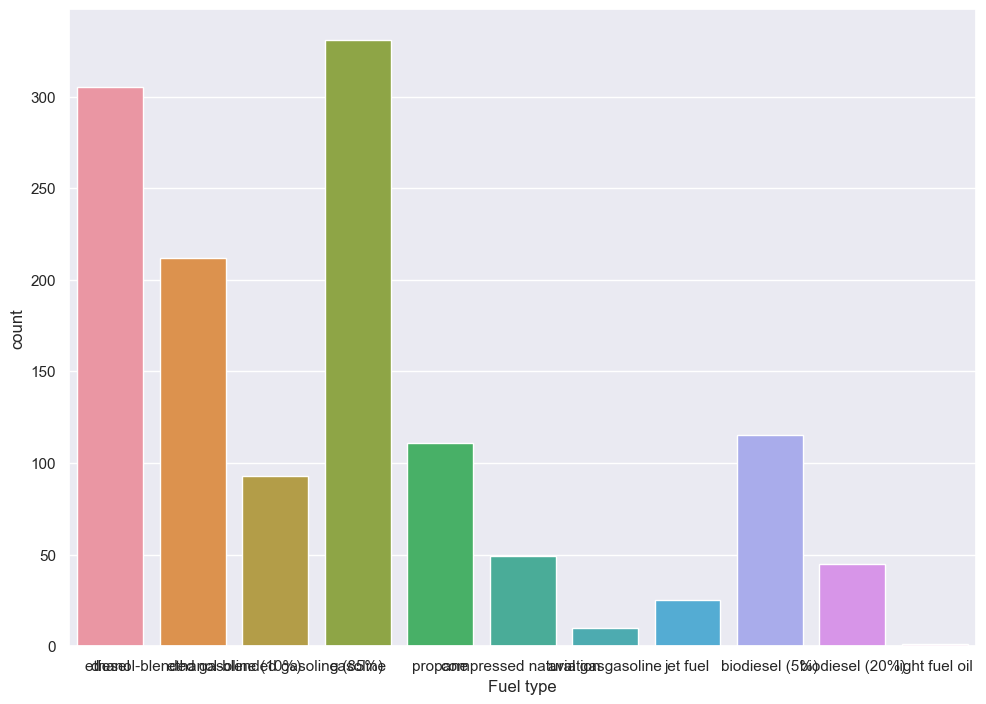

In [188]:
print(sns.countplot(x ='Fuel type', data = df))


# EDA

# colinearity

<Axes: >

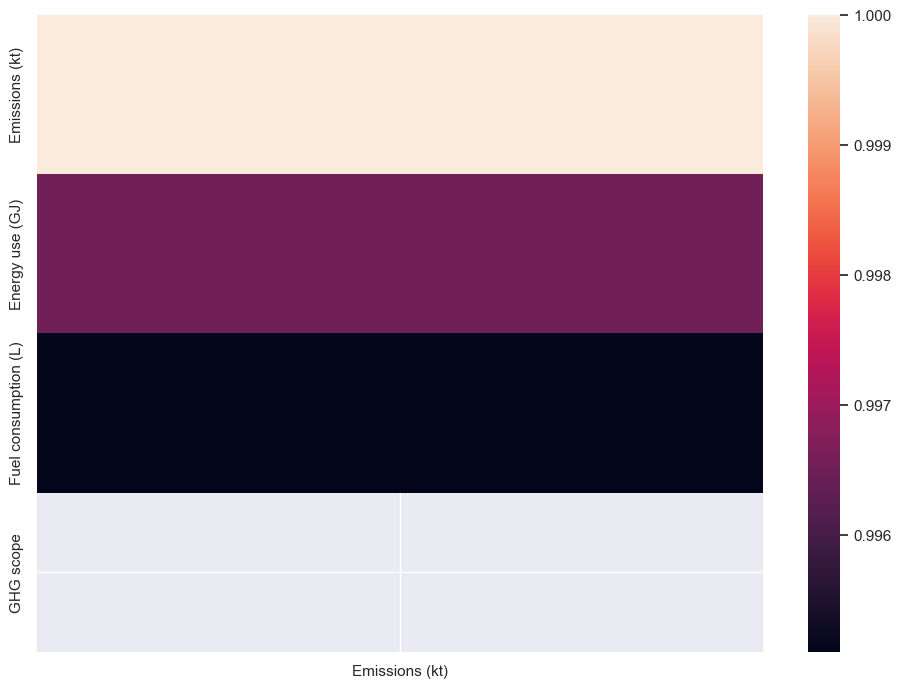

In [189]:
sns.heatmap(df.corr()[['Emissions (kt)']].sort_values(by='Emissions (kt)', ascending=False))


# colinearity in values

In [190]:
df.corr()['Emissions (kt)'].sort_values()

Fuel consumption (L)    0.995104
Energy use (GJ)         0.996524
Emissions (kt)          1.000000
GHG scope                    NaN
Name: Emissions (kt), dtype: float64

In [191]:
df.corr()

,GHG scope,Fuel consumption (L),Energy use (GJ),Emissions (kt)
GHG scope,NaN,NaN,NaN,NaN
Fuel consumption (L),NaN,1.000000,0.999531,0.995104
Energy use (GJ),NaN,0.999531,1.000000,0.996524
Emissions (kt),NaN,0.995104,0.996524,1.000000


# EDA

In [192]:
df.describe()

,GHG scope,Fuel consumption (L),Energy use (GJ),Emissions (kt)
count,1297.0,1297.000000,1297.000000,1.297000e+03
mean,1.0,105873.004575,3735.636529,2.429530e-01
std,0.0,121875.797417,4312.942110,2.834351e-01
min,1.0,0.723000,0.000839,4.750000e-08
25%,1.0,3391.400000,110.282007,5.660748e-03
50%,1.0,33597.117400,1140.772320,6.809740e-02
75%,1.0,292000.075000,10319.383570,6.756659e-01
max,1.0,292000.075000,10319.383570,6.756660e-01


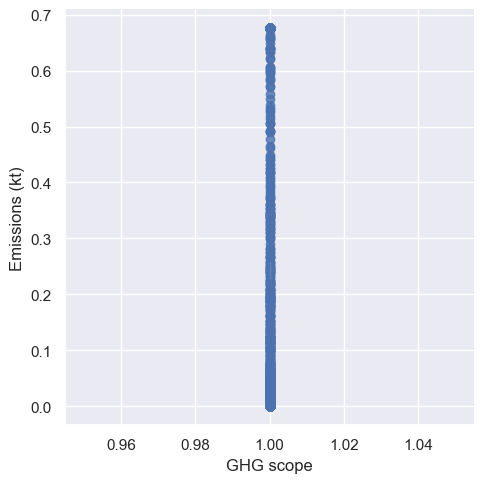

In [193]:
sns.lmplot(y='Emissions (kt)', x='GHG scope', data=df)

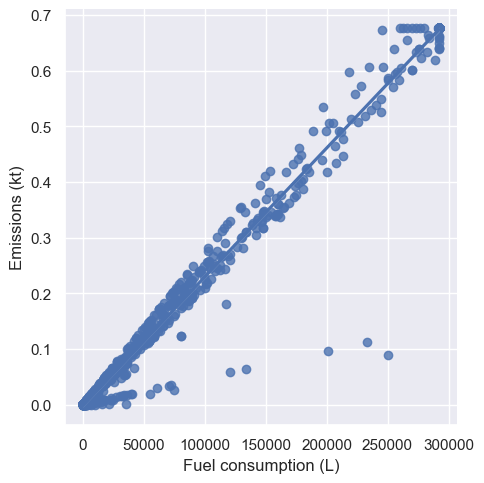

In [194]:
#Energy use (GJ)
sns.lmplot(y='Emissions (kt)', x='Fuel consumption (L)', data=df)

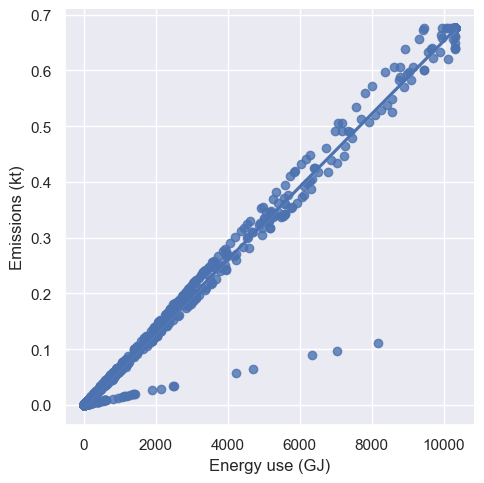

In [195]:

sns.lmplot(y='Emissions (kt)', x='Energy use (GJ)', data=df)

# towards normalization

# 

In [196]:
#to get all the categorical 
columns=df.columns
total_columns=len(columns)
for i in range(0,total_columns, 1):
    print(columns[i])
    print(df[columns[i]].unique())


Federal organization
['Agriculture and Agri-Food Canada' 'Canada Border Services Agency'
 'Canada Revenue Agency' 'Canadian Food Inspection Agency'
 'Canadian Space Agency' 'Correctional Service Canada'
 'Crown-Indigenous Relations and Northern Affairs Canada'
 'Employment and Social Development Canada'
 'Environment and Climate Change Canada' 'Fisheries and Oceans Canada'
 'Health Canada' 'Immigration, Refugees and Citizenship Canada'
 'Indigenous Services Canada'
 'Innovation, Science and Economic Development Canada' 'National Defence'
 'National Research Council Canada' 'Natural Resources Canada'
 'Parks Canada' 'Public Services and Procurement Canada'
 'Royal Canadian Mounted Police' 'Transport Canada'
 'Shared Services Canada' 'Public Safety Canada']
Fiscal year
['2005-06' '2010-11' '2011-12' '2012-13' '2013-14' '2014-15' '2015-16'
 '2016-17' '2017-18' '2018-19' '2019-20' '2020-21' '2021-22']
Fleet type
['on-road vehicles' 'other mobile equipment' 'aircraft' 'Marine vessels'
 'On-

In [197]:

data=df.drop(df.columns[[0,1]], axis=1)
#df.drop(['A'], axis=1)

# get dummies

In [198]:

a = pd.get_dummies(data['Fleet type'], prefix = "Fleet type")
b = pd.get_dummies(data['Energy category'], prefix = "Energy category")
c = pd.get_dummies(data['Fuel type'], prefix = "Fuel type")


In [199]:
frames = [data, a, b, c]
data = pd.concat(frames, axis = 1)
data.head()

,Fleet type,GHG scope,Energy category,Fuel type,Fuel consumption (L),Energy use (GJ),Emissions (kt),Fleet type_Aircraft,Fleet type_Marine Vessels,Fleet type_Marine vessels,...,Fuel type_biodiesel (20%),Fuel type_biodiesel (5%),Fuel type_compressed natural gas,Fuel type_diesel,Fuel type_ethanol-blended gasoline (10%),Fuel type_ethanol-blended gasoline (85%),Fuel type_gasoline,Fuel type_jet fuel,Fuel type_light fuel oil,Fuel type_propane
0,on-road vehicles,1,"fuel oil (1,2,4,5,6, diesel, kerosene)",diesel,276954.049900,10319.383570,0.675666,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,on-road vehicles,1,fuels with renewable content,ethanol-blended gasoline (10%),213748.562800,7237.526336,0.445890,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,on-road vehicles,1,fuels with renewable content,ethanol-blended gasoline (85%),250611.000300,6342.964417,0.089167,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,on-road vehicles,1,gasoline,gasoline,292000.075000,10319.383570,0.675666,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,on-road vehicles,1,liquified petroleum gas,propane,2697.999442,68.286366,0.004156,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [200]:
data = data.drop(columns = ['Fleet type', 'Energy category', 'Fuel type', 'GHG scope'])
data.head()


,Fuel consumption (L),Energy use (GJ),Emissions (kt),Fleet type_Aircraft,Fleet type_Marine Vessels,Fleet type_Marine vessels,Fleet type_On-road vehicles,Fleet type_Other mobile equipment,Fleet type_aircraft,Fleet type_on-road vehicles,...,Fuel type_biodiesel (20%),Fuel type_biodiesel (5%),Fuel type_compressed natural gas,Fuel type_diesel,Fuel type_ethanol-blended gasoline (10%),Fuel type_ethanol-blended gasoline (85%),Fuel type_gasoline,Fuel type_jet fuel,Fuel type_light fuel oil,Fuel type_propane
0,276954.049900,10319.383570,0.675666,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
1,213748.562800,7237.526336,0.445890,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,250611.000300,6342.964417,0.089167,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
3,292000.075000,10319.383570,0.675666,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
4,2697.999442,68.286366,0.004156,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1


# scaling

In [201]:
y = data.loc[:, data.columns == 'Emissions (kt)']
y= pd.DataFrame(y, columns=['Emissions (kt)'])
y

,Emissions (kt)
0,0.675666
1,0.445890
2,0.089167
3,0.675666
4,0.004156
...,...
1292,0.002179
1293,0.675666
1294,0.675666
1295,0.045302


In [202]:
#x_data = data.iloc[: , :-1]
x_data = data.loc[:, data.columns != 'Emissions (kt)']
x_data.columns

Index(['Fuel consumption (L)', 'Energy use (GJ)', 'Fleet type_Aircraft',
       'Fleet type_Marine Vessels', 'Fleet type_Marine vessels',
       'Fleet type_On-road vehicles', 'Fleet type_Other mobile equipment',
       'Fleet type_aircraft', 'Fleet type_on-road vehicles',
       'Fleet type_other mobile equipment',
       'Energy category_Fuels with renewable content',
       'Energy category_Gasoline', 'Energy category_Liquified petroleum gas',
       'Energy category_Natural gas', 'Energy category_aviation fuel',
       'Energy category_fuel oil (1,2,4,5,6, diesel, kerosene)',
       'Energy category_fuels with renewable content',
       'Energy category_gasoline', 'Energy category_liquified petroleum gas',
       'Energy category_natural gas', 'Fuel type_aviation gasoline',
       'Fuel type_biodiesel (20%)', 'Fuel type_biodiesel (5%)',
       'Fuel type_compressed natural gas', 'Fuel type_diesel',
       'Fuel type_ethanol-blended gasoline (10%)',
       'Fuel type_ethanol-blended

In [203]:
x_data

,Fuel consumption (L),Energy use (GJ),Fleet type_Aircraft,Fleet type_Marine Vessels,Fleet type_Marine vessels,Fleet type_On-road vehicles,Fleet type_Other mobile equipment,Fleet type_aircraft,Fleet type_on-road vehicles,Fleet type_other mobile equipment,...,Fuel type_biodiesel (20%),Fuel type_biodiesel (5%),Fuel type_compressed natural gas,Fuel type_diesel,Fuel type_ethanol-blended gasoline (10%),Fuel type_ethanol-blended gasoline (85%),Fuel type_gasoline,Fuel type_jet fuel,Fuel type_light fuel oil,Fuel type_propane
0,276954.049900,10319.383570,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
1,213748.562800,7237.526336,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,250611.000300,6342.964417,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
3,292000.075000,10319.383570,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
4,2697.999442,68.286366,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1292,6123.997851,154.998386,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
1293,292000.075000,10319.383570,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
1294,292000.075000,10319.383570,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
1295,18369.011770,642.915412,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0


In [205]:
from sklearn import preprocessing




scaler = preprocessing.MinMaxScaler()
x_data1 = scaler.fit_transform(x_data)
scaled_df = pd.DataFrame(x_data1, columns=(['Fuel consumption (L)', 'Energy use (GJ)',
       'Fleet type_Aircraft', 'Fleet type_Marine Vessels',
       'Fleet type_Marine vessels', 'Fleet type_On-road vehicles',
       'Fleet type_Other mobile equipment', 'Fleet type_aircraft',
       'Fleet type_on-road vehicles', 'Fleet type_other mobile equipment',
       'Energy category_Fuels with renewable content',
       'Energy category_Gasoline', 'Energy category_Liquified petroleum gas',
       'Energy category_Natural gas', 'Energy category_aviation fuel',
       'Energy category_fuel oil (1,2,4,5,6, diesel, kerosene)',
       'Energy category_fuels with renewable content',
       'Energy category_gasoline', 'Energy category_liquified petroleum gas',
       'Energy category_natural gas', 'Fuel type_aviation gasoline',
       'Fuel type_biodiesel (20%)', 'Fuel type_biodiesel (5%)',
       'Fuel type_compressed natural gas', 'Fuel type_diesel',
       'Fuel type_ethanol-blended gasoline (10%)',
       'Fuel type_ethanol-blended gasoline (85%)', 'Fuel type_gasoline',
       'Fuel type_jet fuel', 'Fuel type_light fuel oil', 'Fuel type_propane']))
print(scaled_df)

      Fuel consumption (L)  Energy use (GJ)  Fleet type_Aircraft  \
0                 0.948472         1.000000                  0.0   
1                 0.732015         0.701353                  0.0   
2                 0.858256         0.614665                  0.0   
3                 1.000000         1.000000                  0.0   
4                 0.009237         0.006617                  0.0   
...                    ...              ...                  ...   
1292              0.020970         0.015020                  0.0   
1293              1.000000         1.000000                  0.0   
1294              1.000000         1.000000                  0.0   
1295              0.062905         0.062302                  0.0   
1296              0.002381         0.001707                  0.0   

      Fleet type_Marine Vessels  Fleet type_Marine vessels  \
0                           0.0                        0.0   
1                           0.0                        0.0 

In [206]:
y_data = scaler.fit_transform(y)
scaled_y = pd.DataFrame(y_data, columns=(['Emissions (kt)']))

In [207]:
scaled_df.drop

<bound method DataFrame.drop of       Fuel consumption (L)  Energy use (GJ)  Fleet type_Aircraft  \
0                 0.948472         1.000000                  0.0   
1                 0.732015         0.701353                  0.0   
2                 0.858256         0.614665                  0.0   
3                 1.000000         1.000000                  0.0   
4                 0.009237         0.006617                  0.0   
...                    ...              ...                  ...   
1292              0.020970         0.015020                  0.0   
1293              1.000000         1.000000                  0.0   
1294              1.000000         1.000000                  0.0   
1295              0.062905         0.062302                  0.0   
1296              0.002381         0.001707                  0.0   

      Fleet type_Marine Vessels  Fleet type_Marine vessels  \
0                           0.0                        0.0   
1                          

# split

In [218]:
x_train, x_test, y_train, y_test = train_test_split(scaled_df,scaled_y,test_size = 0.3, random_state=33)

# linear regression

In [219]:


from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x_train, y_train)
print(knr.score(x_train, y_train))
print(knr.score(x_test, y_test))


0.9700676485073009
0.9553312612393822


In [220]:
print(lr.intercept_)
print(lr.coef_)

[-1.21099313e+12]
[[-1.19741606e+00  2.18605657e+00 -3.80877839e+11 -3.80877839e+11
  -3.80877839e+11 -3.80877839e+11 -3.80877839e+11 -3.80877839e+11
  -3.80877839e+11 -3.80877839e+11  1.38428813e+12  2.51697177e+12
  -7.02835202e+11  3.05616810e+11  1.41146485e+12  1.38428813e+12
   1.38428813e+12  2.51697177e+12 -7.02835202e+11  3.05616810e+11
   1.80406116e+11  2.07582839e+11  2.07582839e+11  1.28625416e+12
   2.07582839e+11  2.07582839e+11  2.07582839e+11 -9.25100805e+11
   1.80406116e+11  2.07582839e+11  2.29470617e+12]]


In [222]:
y_pred = lr.predict(X=x_test)
y_pred

array([[ 1.00341797e-01],
       [ 1.00317383e+00],
       [ 4.39453125e-03],
       [ 2.61718750e-01],
       [ 9.71679688e-01],
       [ 1.00317383e+00],
       [ 1.09863281e-02],
       [ 1.00317383e+00],
       [ 2.56347656e-01],
       [ 9.77294922e-01],
       [-5.39550781e-02],
       [ 3.71582031e-01],
       [ 6.59179688e-02],
       [ 1.01806641e-01],
       [ 3.88183594e-02],
       [ 2.44140625e-02],
       [ 3.88671875e-01],
       [ 1.00317383e+00],
       [ 4.39453125e-03],
       [ 1.62841797e-01],
       [ 1.00317383e+00],
       [ 1.36718750e-02],
       [ 2.41699219e-02],
       [ 3.36914062e-01],
       [ 1.00317383e+00],
       [ 1.04980469e-02],
       [ 2.41699219e-02],
       [-6.83593750e-03],
       [ 7.91015625e-02],
       [ 9.94384766e-01],
       [-9.03320312e-03],
       [-7.81250000e-03],
       [-4.88281250e-04],
       [-1.70898438e-02],
       [ 1.01416016e+00],
       [ 3.93066406e-02],
       [-4.88281250e-04],
       [ 9.88769531e-02],
       [-6.1

# Model Evaluation

In [225]:
print('RMSE: {:0.4f}'.format(np.sqrt(mean_squared_error(y_test,y_pred))))
print('MAE: {:0.4f}'.format(mean_absolute_error(y_test,y_pred)))
print('R2_score: {:0.4f}'.format(r2_score(y_test,y_pred)))

RMSE: 0.0210
MAE: 0.0137
R2_score: 0.9976


# Ridge Regression

In [245]:
model = Ridge(alpha=0.01)
model.fit(x_train, y_train)



Ridge(alpha=0.01)

In [246]:
y_ridge = model.predict(x_test)
y_ridge

array([[ 9.81513036e-02],
       [ 9.99372278e-01],
       [-1.24367643e-03],
       [ 2.61044574e-01],
       [ 9.94435809e-01],
       [ 9.99372278e-01],
       [ 9.57176880e-03],
       [ 9.99372278e-01],
       [ 2.53161703e-01],
       [ 9.74809756e-01],
       [-5.71045981e-02],
       [ 3.82279186e-01],
       [ 6.67386252e-02],
       [ 9.31574755e-02],
       [ 3.64567782e-02],
       [ 3.36839829e-03],
       [ 3.88102559e-01],
       [ 9.99372278e-01],
       [ 1.53181671e-02],
       [ 1.60496848e-01],
       [ 9.99372278e-01],
       [ 1.18400962e-02],
       [ 3.15730980e-03],
       [ 3.34648317e-01],
       [ 9.99372278e-01],
       [ 7.02956611e-03],
       [ 4.07707078e-02],
       [ 1.71777847e-02],
       [ 6.95743696e-02],
       [ 9.94190917e-01],
       [-9.89749289e-03],
       [-1.48283755e-02],
       [ 1.28240355e-04],
       [ 1.05386926e-02],
       [ 1.00392252e+00],
       [ 3.69907482e-02],
       [ 2.42412648e-04],
       [ 1.19397266e-01],
       [ 1.0

# Model Evaluation

In [247]:
print('RMSE: {:0.4f}'.format(np.sqrt(mean_squared_error(y_test,y_ridge))))
print('MAE: {:0.4f}'.format(mean_absolute_error(y_test,y_ridge)))
print('R2_score: {:0.4f}'.format(r2_score(y_test,y_ridge)))

RMSE: 0.0167
MAE: 0.0098
R2_score: 0.9985


# Lasso Regression

In [248]:
model = Lasso(alpha=0.01)
model.fit(x_train, y_train)

Lasso(alpha=0.01)

In [249]:
y_lasso = model.predict(x_test)
y_lasso

array([0.1001795 , 0.95929752, 0.01920273, 0.28063029, 0.95929752,
       0.95929752, 0.01767805, 0.95929752, 0.23585446, 0.95929752,
       0.01792993, 0.37895516, 0.07622215, 0.09096721, 0.04075244,
       0.01747761, 0.40296484, 0.95929752, 0.01934213, 0.15296394,
       0.95929752, 0.01748084, 0.01747849, 0.32067145, 0.95929752,
       0.01773359, 0.04701687, 0.02619348, 0.06427743, 0.95929752,
       0.0197606 , 0.01786347, 0.01767283, 0.02782112, 0.95929752,
       0.03402782, 0.01778279, 0.12040872, 0.01789716, 0.52812928,
       0.84677012, 0.5903827 , 0.63226977, 0.02533891, 0.95232895,
       0.95929752, 0.95929752, 0.02333251, 0.95929752, 0.02534016,
       0.03050852, 0.04527469, 0.1076331 , 0.11153368, 0.02355119,
       0.01747735, 0.02048129, 0.04944304, 0.14489226, 0.95929752,
       0.95929752, 0.06732504, 0.12829879, 0.20300709, 0.02943022,
       0.02620343, 0.53566449, 0.2716643 , 0.04412536, 0.03676517,
       0.25303049, 0.95929752, 0.07284626, 0.02105854, 0.01824

# Model Evaluation

In [250]:
print('RMSE: {:0.4f}'.format(np.sqrt(mean_squared_error(y_test,y_lasso))))
print('MAE: {:0.4f}'.format(mean_absolute_error(y_test,y_lasso)))
print('R2_score: {:0.4f}'.format(r2_score(y_test,y_lasso)))

RMSE: 0.0315
MAE: 0.0252
R2_score: 0.9945


# KNN Regressor

In [251]:
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor()
knr.fit(x_train, y_train)
print(knr.score(x_train, y_train))
print(knr.score(x_test, y_test))

0.9700676485073009
0.9553312612393822


In [253]:
knr_pred = knr.predict(x_test)
knr_pred

array([[8.25327813e-02],
       [1.00000000e+00],
       [8.63129033e-04],
       [2.59416834e-01],
       [1.00000000e+00],
       [1.00000000e+00],
       [1.78690194e-04],
       [1.00000000e+00],
       [2.54689998e-01],
       [1.00000000e+00],
       [1.26341248e-04],
       [4.05330752e-01],
       [6.75678680e-02],
       [8.44637974e-02],
       [2.66336805e-02],
       [3.12156916e-07],
       [4.08845383e-01],
       [1.00000000e+00],
       [9.88919580e-03],
       [7.72856802e-02],
       [1.00000000e+00],
       [1.45845502e-06],
       [8.10763659e-07],
       [3.46731631e-01],
       [1.00000000e+00],
       [2.37979877e-04],
       [2.57498100e-02],
       [2.73794940e-02],
       [4.73553071e-02],
       [1.00000000e+00],
       [5.22231636e-03],
       [9.67115980e-04],
       [1.31242546e-04],
       [4.03850298e-01],
       [1.00000000e+00],
       [2.00259978e-02],
       [2.55168992e-04],
       [1.22923740e-01],
       [3.11560541e-03],
       [5.07116633e-01],


In [254]:
print('RMSE: {:0.4f}'.format(np.sqrt(mean_squared_error(y_test,knr_pred))))
print('MAE: {:0.4f}'.format(mean_absolute_error(y_test,knr_pred)))
print('R2_score: {:0.4f}'.format(r2_score(y_test,knr_pred)))

RMSE: 0.0898
MAE: 0.0284
R2_score: 0.9553


# DecisionTreeRegressor

In [255]:
from sklearn.tree import DecisionTreeRegressor

dt_model = DecisionTreeRegressor(random_state = 42)

dt_model.fit(x_train, y_train)

DecisionTreeRegressor(random_state=42)

In [257]:
dtr_pred = dt_model.predict(x_test)
dtr_pred

array([8.11220505e-02, 1.00000000e+00, 1.70324773e-03, 2.56990112e-01,
       1.00000000e+00, 1.00000000e+00, 1.86717267e-04, 1.00000000e+00,
       2.54549546e-01, 9.96207103e-01, 1.27560372e-04, 3.61076730e-01,
       6.60960588e-02, 8.25764393e-02, 2.51454101e-02, 3.65258156e-07,
       4.01560427e-01, 1.00000000e+00, 1.79216445e-03, 1.56378231e-01,
       1.00000000e+00, 3.39758129e-06, 1.16177824e-06, 3.51685352e-01,
       1.00000000e+00, 2.46141602e-04, 3.28695673e-02, 9.46396141e-03,
       5.24152614e-02, 1.00000000e+00, 2.07277945e-03, 3.84051467e-04,
       2.02719257e-04, 1.07283406e-02, 1.00000000e+00, 1.83860493e-02,
       3.03134262e-04, 1.11990236e-01, 4.18944449e-04, 5.02823573e-01,
       8.44545429e-01, 6.64460029e-01, 6.18007660e-01, 9.05580854e-03,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 6.27197876e-03,
       9.99593128e-01, 8.83263612e-03, 1.49362958e-02, 2.95841405e-02,
       8.96984586e-02, 1.06950843e-01, 6.27197876e-03, 6.25308998e-08,
      

In [258]:
print('RMSE: {:0.4f}'.format(np.sqrt(mean_squared_error(y_test,dtr_pred))))
print('MAE: {:0.4f}'.format(mean_absolute_error(y_test,dtr_pred)))
print('R2_score: {:0.4f}'.format(r2_score(y_test,dtr_pred)))

RMSE: 0.0152
MAE: 0.0052
R2_score: 0.9987


# RandomForestRegressor

In [261]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor()
rf_model.fit(x_train, y_train)

RandomForestRegressor()

In [264]:
y_rf_pred = rf_model.predict(x_test)
y_rf_pred

array([8.33199063e-02, 1.00000000e+00, 1.70746401e-03, 2.72406162e-01,
       1.00000000e+00, 1.00000000e+00, 1.86698086e-04, 1.00000000e+00,
       2.45902898e-01, 9.95625495e-01, 1.48611113e-04, 3.89818103e-01,
       6.30951650e-02, 7.98435480e-02, 2.56800779e-02, 3.55477974e-07,
       4.05975419e-01, 1.00000000e+00, 1.97843271e-03, 1.49782141e-01,
       1.00000000e+00, 3.68024680e-06, 1.03127719e-06, 3.53026355e-01,
       1.00000000e+00, 2.35264897e-04, 3.16433271e-02, 9.54408224e-03,
       4.96016881e-02, 1.00000000e+00, 2.30307499e-03, 3.85524191e-04,
       1.91527455e-04, 1.03436964e-02, 1.00000000e+00, 1.78398745e-02,
       2.95210617e-04, 1.12573787e-01, 4.15388850e-04, 5.20208859e-01,
       8.83082231e-01, 6.12161211e-01, 6.18987654e-01, 8.59686576e-03,
       9.88435839e-01, 1.00000000e+00, 1.00000000e+00, 6.07103006e-03,
       9.99620105e-01, 8.64234268e-03, 1.44229112e-02, 2.93475448e-02,
       9.01388725e-02, 1.00795286e-01, 6.22486411e-03, 2.93706345e-07,
      

In [266]:
print('RMSE: {:0.4f}'.format(np.sqrt(mean_squared_error(y_test,y_rf_pred))))
print('MAE: {:0.4f}'.format(mean_absolute_error(y_test,y_rf_pred)))
print('R2_score: {:0.4f}'.format(r2_score(y_test,y_rf_pred)))

RMSE: 0.0135
MAE: 0.0052
R2_score: 0.9990


# Conclusion
Algorithms Used :
In this project we have used Linear Regression, KNN Regressor, Decision Trees and Random Forest. We also added Regularization Techniques to check the performance of the models

Final Model Algorithm :
Among the models that we tried building, Random Forest performed the best in terms of r2 score

Model Performance Measures :
Random Forest
RMSE: 0.0135
MAE: 0.0052
R2: 0.9990